In [1]:
import json
import ast
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
# alt.renderers.enable('notebook')
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import init
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
import random
import numpy as np
import time
import random
from sklearn.metrics import f1_score
from collections import defaultdict
import torch.nn.functional as F

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
neighborhoods = {}
cities = {}
states = {}
postal_codes = {}
latitudes = {}
longitudes = {}
stars = {}
review_count = {}
alcohol = {}
bike_parking = {}
accepts_credit_cards = {}
caters = {}
drivethru = {}
goodforkids = {}
hastv = {}
noise_level = {}
outdoor_seating = {}
restuarants_price_range = {} 
delivery = {}
goodforgroups = {}
pricerange = {}
reservations = {}
table_service = {}
takeout = {}
wifi = {}

In [42]:
stars = {}
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        d = json.loads(line)
        attributes = d['attributes']
        if attributes != None:
            business_id = d['business_id'].encode('utf-8') 
            star_rating = float(d['stars'])
            stars[business_id] = star_rating

In [3]:
business_mappings = {}
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        d = json.loads(line)
        attributes = d['attributes']
        if attributes != None:
            business_id = d['business_id'].encode('utf-8')      
            # neighborhoods[business_id] = d['neighborhoods'].encode('utf-8')
            city = d['city'].encode('utf-8')
            state = d['state'].encode('utf-8')
            cities[business_id] = city
            states[business_id] = state

            postal_codes[business_id] = d['postal_code'].encode('utf-8')
            latitude = d['latitude']
            if latitude == None:
                latitude = -1
            latitudes[business_id] = latitude

            longitude = d['longitude']
            if longitude == None:
                longitude = -1
            longitudes[business_id] = longitude
            star_rating = float(d['stars'])
            stars[business_id] = star_rating

            review_count[business_id] = float(d['review_count'])
            
            if "Alcohol" in attributes:
                alcohol[business_id] = attributes["Alcohol"].encode('utf-8')
            else:
                alcohol[business_id] = -1
            if "BikeParking" in attributes:
                bike_parking[business_id] = attributes["BikeParking"].encode('utf-8')
            else:
                bike_parking[business_id] = -1
            if "BusinessAcceptsCreditCards" in attributes:
                accepts_credit_cards[business_id] = attributes["BusinessAcceptsCreditCards"].encode('utf-8')
            else:
                accepts_credit_cards[business_id] = -1
            if "Caters" in attributes:
                caters[business_id] = attributes["Caters"].encode('utf-8')
            else:
                caters[business_id] = -1
            if "GoodForKids" in attributes:
                goodforkids[business_id] = attributes["GoodForKids"].encode('utf-8')
            else:
                goodforkids[business_id] = -1
            if "DriveThru" in attributes:
                drivethru[business_id] = attributes["DriveThru"].encode('utf-8')
            else:
                drivethru[business_id] = -1
            if "HasTV" in attributes:
                hastv[business_id] = attributes["HasTV"].encode('utf-8')
            else:
                hastv[business_id] = -1
            if "NoiseLevel" in attributes:
                noise_level[business_id] = attributes["NoiseLevel"].encode('utf-8')
            else:
                noise_level[business_id] = -1
            if "OutdoorSeating" in attributes:
                outdoor_seating[business_id] = attributes["OutdoorSeating"].encode('utf-8')
            else:
                outdoor_seating[business_id] = -1
            if "RestaurantPriceRange" in attributes:
                restuarants_price_range[business_id] = attributes["RestaurantPriceRange"].encode('utf-8')
            else:
                restuarants_price_range[business_id] = -1
            if "RestaurantsDelivery" in attributes:
                delivery[business_id] = attributes["RestaurantsDelivery"].encode('utf-8')
            else:
                delivery[business_id] = -1
            if "RestaurantsGoodForGroups" in attributes:
                goodforgroups[business_id] = attributes["RestaurantsGoodForGroups"].encode('utf-8')
            else:
                goodforgroups[business_id] = -1
            if "RestaurantsPriceRange2" in attributes:
                pricerange[business_id] = attributes["RestaurantsPriceRange2"].encode('utf-8')
            else:
                pricerange[business_id] = -1
            if "RestaurantsReservations" in attributes:
                reservations[business_id] = attributes["RestaurantsReservations"].encode('utf-8')
            else:
                reservations[business_id] = -1
            if "RestaurantsTableService" in attributes:
                table_service[business_id] = attributes["RestaurantsTableService"].encode('utf-8')
            else:
                table_service[business_id] = -1
            if "RestaurantsTakeOut" in attributes:
                takeout[business_id] = attributes["RestaurantsTakeOut"].encode('utf-8')
            else:
                takeout[business_id] = -1
            if "WiFi" in attributes:
                wifi[business_id] = attributes["WiFi"].encode('utf-8')
            else:
                wifi[business_id] = -1

In [4]:
mappings = [cities, states, postal_codes, alcohol, bike_parking, accepts_credit_cards, caters, drivethru, goodforkids, hastv, noise_level, outdoor_seating, restuarants_price_range, delivery, goodforgroups, pricerange, reservations, table_service, takeout, wifi]
categorical_mappings = []
for mapping in mappings:           
    sorted_map = {}
    map_values = set(mapping.values())
    map_values = {value.decode('utf-8') if isinstance(value, bytes) else value for value in map_values}
    map_values = {str(value) for value in map_values}
    sorted_var_set = sorted(map_values)
    for value in map_values:
        # Set value theo vị trí
        sorted_map[value] = sorted_var_set.index(value)
    categorical_mappings.append(sorted_map)

In [7]:
get_feature_vector(business_id)

[17,
 5,
 459,
 0,
 27.771002,
 -82.3949096,
 9.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [27]:
categorical_mappings[0][cities[business_id].decode('utf-8')]

17

In [6]:
def get_feature_vector(business_id):
    feature_vector = []
    # feature_vector.append(categorical_mappings[0][neighborhoods[business_id]])
    feature_vector.append(categorical_mappings[0][cities[business_id].decode('utf-8')])
    feature_vector.append(categorical_mappings[1][states[business_id].decode('utf-8')])
    feature_vector.append(categorical_mappings[2][postal_codes[business_id].decode('utf-8')])
    feature_vector.append(categorical_mappings[3].get(alcohol[business_id],0))
    feature_vector.append(latitudes[business_id])
    feature_vector.append(longitudes[business_id])
    feature_vector.append(review_count[business_id])
    feature_vector.append(categorical_mappings[4].get(bike_parking.get(business_id), 0))
    feature_vector.append(categorical_mappings[5].get(accepts_credit_cards.get(business_id), 0))
    feature_vector.append(categorical_mappings[6].get(caters.get(business_id), 0))
    feature_vector.append(categorical_mappings[7].get(drivethru.get(business_id), 0))
    feature_vector.append(categorical_mappings[8].get(goodforkids.get(business_id), 0))
    feature_vector.append(categorical_mappings[9].get(hastv.get(business_id), 0))
    feature_vector.append(categorical_mappings[10].get(noise_level.get(business_id), 0))
    feature_vector.append(categorical_mappings[11].get(outdoor_seating.get(business_id), 0))
    feature_vector.append(categorical_mappings[12].get(restuarants_price_range.get(business_id), 0))
    feature_vector.append(categorical_mappings[13].get(delivery.get(business_id), 0))
    feature_vector.append(categorical_mappings[14].get(goodforgroups.get(business_id), 0))
    feature_vector.append(categorical_mappings[15].get(pricerange.get(business_id), 0))
    feature_vector.append(categorical_mappings[16].get(reservations.get(business_id), 0))
    feature_vector.append(categorical_mappings[17].get(table_service.get(business_id), 0))
    feature_vector.append(categorical_mappings[18].get(takeout.get(business_id), 0))
    feature_vector.append(categorical_mappings[19].get(wifi.get(business_id), 0))
    return feature_vector

In [8]:
X_business = []
y_business = []
print(len(stars))
business_mappings = {}
i = 0
# X_business: Lấy thông tin của businesses được rating
for business_id, rating in stars.items():
    business_mappings[business_id] = i
    X_business.append(get_feature_vector(business_id))
    y_business.append(rating)
    i += 1

136602


In [9]:
X_business

[[957,
  2,
  1118,
  0,
  34.4266787,
  -119.7111968,
  7.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [5,
  13,
  862,
  0,
  38.551126,
  -90.335695,
  15.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1152,
  1,
  1023,
  0,
  32.223236,
  -110.880452,
  22.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [829,
  18,
  260,
  0,
  39.9555052,
  -75.1555641,
  80.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [411,
  18,
  132,
  0,
  40.3381827,
  -75.4716585,
  13.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [25,
  20,
  614,
  0,
  36.269593,
  -87.058943,
  6.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [99,
  13,
  882,
  0,
  38.627695,
  -90.340465,
  13.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [5,
  13,

In [10]:
sorted_y

NameError: name 'sorted_y' is not defined

In [11]:
y_cat = []
sorted_y = sorted(set(y_business))
# y_cat:index rating theo sorted_y
for val in y_business:
    y_cat.append(sorted_y.index(val))

In [12]:
y_cat

[8,
 4,
 5,
 6,
 7,
 2,
 3,
 4,
 1,
 5,
 6,
 3,
 8,
 7,
 6,
 7,
 6,
 7,
 6,
 6,
 6,
 3,
 6,
 4,
 6,
 6,
 5,
 8,
 4,
 7,
 5,
 4,
 5,
 3,
 2,
 7,
 8,
 1,
 4,
 6,
 3,
 4,
 6,
 5,
 8,
 8,
 4,
 6,
 8,
 4,
 4,
 4,
 3,
 6,
 6,
 3,
 5,
 3,
 2,
 4,
 6,
 8,
 6,
 5,
 8,
 1,
 3,
 7,
 7,
 3,
 7,
 5,
 7,
 7,
 7,
 4,
 5,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 5,
 5,
 7,
 7,
 5,
 8,
 5,
 3,
 6,
 6,
 4,
 6,
 6,
 7,
 1,
 6,
 5,
 7,
 4,
 2,
 7,
 5,
 4,
 7,
 8,
 4,
 3,
 7,
 8,
 3,
 6,
 1,
 4,
 5,
 4,
 5,
 5,
 4,
 1,
 2,
 7,
 3,
 5,
 6,
 6,
 8,
 7,
 5,
 6,
 1,
 7,
 8,
 6,
 7,
 8,
 4,
 7,
 5,
 6,
 3,
 6,
 7,
 1,
 5,
 3,
 5,
 5,
 6,
 8,
 3,
 7,
 6,
 6,
 8,
 7,
 7,
 8,
 5,
 7,
 2,
 7,
 4,
 6,
 0,
 1,
 6,
 5,
 5,
 4,
 1,
 6,
 3,
 3,
 1,
 8,
 2,
 7,
 7,
 6,
 1,
 1,
 5,
 5,
 6,
 6,
 6,
 0,
 6,
 8,
 2,
 7,
 7,
 6,
 4,
 5,
 5,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 8,
 5,
 6,
 7,
 8,
 7,
 6,
 7,
 6,
 5,
 6,
 7,
 8,
 5,
 3,
 5,
 7,
 4,
 6,
 6,
 6,
 5,
 7,
 5,
 7,
 4,
 3,
 4,
 7,
 2,
 4,
 4,
 6,
 5,
 5,
 7,
 6,
 6,
 6,
 2,


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_business, y_cat, test_size=0.1, random_state=42)
print(min(y_train), max(y_train))

0 8


# Logistic Regestion

In [14]:
X_train_tensor = torch.from_numpy(np.array(X_train)).float()
y_train_tensor = torch.from_numpy(np.array(y_train)).float().squeeze()
losses_log_reg_9 = []
accuracies_log_reg_9 = []
D_in = 23
D_out = 9
num_epochs = 1000
epochs = [i for i in range(num_epochs)]
model = torch.nn.Sequential(torch.nn.Linear(D_in, D_out))
loss_fn = cross_entropy_loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor.long())
    pred = torch.max(y_pred, 1)[1].float()
    accuracy = (pred == y_train_tensor).float().mean()
    losses_log_reg_9.append(loss.item())
    accuracies_log_reg_9.append(accuracy)
    f1 = f1_score(y_train, pred, average="micro")
    if epoch % 50 == 0:
        print("Epoch {}:, loss: {:.3f}, accuracy: {:.3f}, f1: {:.3f}".format(epoch, loss.item(), accuracy, f1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0:, loss: 198.875, accuracy: 0.063, f1: 0.063
Epoch 50:, loss: 74.763, accuracy: 0.139, f1: 0.139
Epoch 100:, loss: 33.842, accuracy: 0.150, f1: 0.150
Epoch 150:, loss: 22.616, accuracy: 0.160, f1: 0.160
Epoch 200:, loss: 13.811, accuracy: 0.174, f1: 0.174
Epoch 250:, loss: 6.968, accuracy: 0.190, f1: 0.190
Epoch 300:, loss: 4.533, accuracy: 0.198, f1: 0.198
Epoch 350:, loss: 3.516, accuracy: 0.200, f1: 0.200
Epoch 400:, loss: 2.717, accuracy: 0.196, f1: 0.196
Epoch 450:, loss: 2.402, accuracy: 0.192, f1: 0.192
Epoch 500:, loss: 2.325, accuracy: 0.193, f1: 0.193
Epoch 550:, loss: 2.258, accuracy: 0.194, f1: 0.194
Epoch 600:, loss: 2.200, accuracy: 0.196, f1: 0.196
Epoch 650:, loss: 2.149, accuracy: 0.198, f1: 0.198
Epoch 700:, loss: 2.106, accuracy: 0.200, f1: 0.200
Epoch 750:, loss: 2.068, accuracy: 0.202, f1: 0.202
Epoch 800:, loss: 2.037, accuracy: 0.203, f1: 0.203
Epoch 850:, loss: 2.012, accuracy: 0.204, f1: 0.204
Epoch 900:, loss: 1.994, accuracy: 0.207, f1: 0.207
Epoch 950

In [17]:
X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).float().squeeze()
y_pred = model(X_test_tensor)
pred = torch.max(y_pred, 1)[1].float()
accuracy = (pred == y_test_tensor).float().mean()
print("Accuracy on the test set: ", accuracy)

Accuracy on the test set:  tensor(0.2120)


Text(0.5, 0, 'Num epochs')

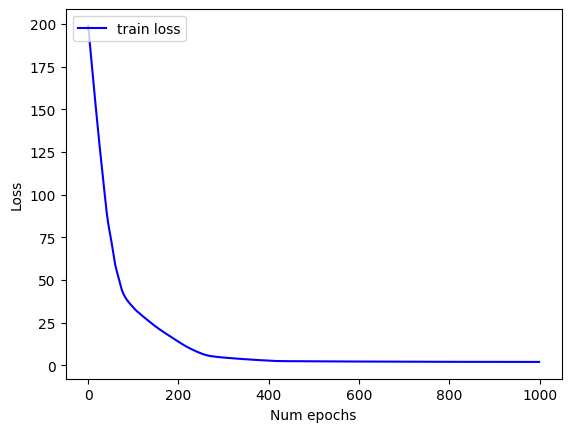

In [18]:
plt.plot(epochs, losses_log_reg_9, 'b', label="train loss");
plt.legend(loc='upper left')
plt.ylabel("Loss")
plt.xlabel("Num epochs")

Text(0.5, 0, 'Num epochs')

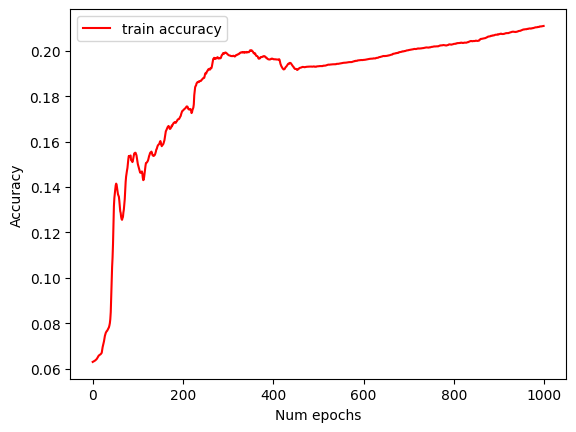

In [19]:
plt.plot(epochs, accuracies_log_reg_9, 'r', label="train accuracy");
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Num epochs")

# GCN

### Getting user features

In [20]:
X_users = []
users_mappings = {}
# users_mappings: dict user_id theo index
with open('yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        feature_vector = []
        d = json.loads(line)
        user_id = d['user_id'].encode('utf-8') 
        feature_vector.append(int(d['useful']))
        feature_vector.append(int(d['funny']))
        feature_vector.append(int(d['cool']))
        feature_vector.append(int(d['fans']))
        feature_vector.append(int(d['average_stars']))
        feature_vector.append(int(d['compliment_hot']))
        feature_vector.append(int(d['compliment_more']))
        feature_vector.append(int(d['compliment_profile']))
        feature_vector.append(int(d['compliment_cute']))
        feature_vector.append(int(d['compliment_list']))
        feature_vector.append(int(d['compliment_note']))
        feature_vector.append(int(d['compliment_plain']))
        feature_vector.append(int(d['compliment_cool']))
        feature_vector.append(int(d['compliment_funny']))
        feature_vector.append(int(d['compliment_writer']))
        feature_vector.append(int(d['compliment_photos']))
        X_users.append(feature_vector)
        users_mappings[user_id] = i

### Creating the adjacency matrix

In [21]:
# business_to_user: business_id: ds user_id + rating cho business đó
business_to_user = {}

with open('yelp_academic_dataset_review.json', 'r' , encoding='utf-8') as f:
    for i, line in enumerate(f):
        d = json.loads(line)
        user_id = d['user_id'].encode('utf-8') 
        business_id = d['business_id'].encode('utf-8') 
        stars = int(d['stars'])
        if business_id in business_to_user:
            business_to_user[business_id].append((user_id, stars))
        else:
            business_to_user[business_id] = [(user_id, stars)]

### Define the aggregators

In [22]:

class Aggregator(nn.Module):
    def __init__(self, features_business, features_users): 
        super(Aggregator, self).__init__()
        self.features_business = features_business
        self.features_users = features_users
        
    def forward(self, nodes, neighbors):
        all_users = list(set().union(*neighbors))
        all_users_reindexed = {user:idx for idx,user in enumerate(all_users)}
        num_unique_users = len(all_users)
        num_businesses = len(neighbors)
        
        local_adj_m = Variable(torch.zeros(num_businesses, num_unique_users))
        column_indices = [all_users_reindexed[n] for neighborhood in neighbors for n in neighborhood]   
        row_indices = [business for business in range(num_businesses) for user in range(len(neighbors[business]))]
        local_adj_m[row_indices, column_indices] = 1
        neighbors_sum = local_adj_m.sum(1, keepdim=True) + 1e-7
        local_adj_m = local_adj_m.div(neighbors_sum)
        neighborhood_embeddings = self.features_users(torch.LongTensor(all_users))
        neighborhood_aggregation = local_adj_m.mm(neighborhood_embeddings)
        return neighborhood_aggregation

### Define the encoders

In [24]:
class Encoder(nn.Module):
    def __init__(self, features_business, features_users, feat_dim_users, feat_dim_business,
            embed_dim, adj_lists, aggregator): 
        super(Encoder, self).__init__()

        self.features_business = features_business
        self.features_users = features_users
        self.feat_dim_users = feat_dim_users
        self.feat_dim_business = feat_dim_business
        self.adj_lists = adj_lists
        self.aggregator = aggregator
        self.embed_dim = embed_dim
        self.weight = nn.Parameter(
                torch.FloatTensor(embed_dim, self.feat_dim_users + self.feat_dim_business))
        init.xavier_uniform(self.weight)

    def forward(self, nodes):
        neigh_feats = self.aggregator.forward(nodes, [self.adj_lists[int(node)] for node in nodes])
        self_feats = self.features_business(torch.LongTensor(nodes))
        combined = torch.cat([self_feats, neigh_feats], dim=1)
        combined = F.relu(self.weight.mm(combined.t()))
        return combined

### GCN Model

In [25]:
class GCN(nn.Module):

    def __init__(self, features_business, features_users, adj_lists, num_classes):
        super(GCN, self).__init__()
        self.num_classes = num_classes
        self.feat_dim_users = 16
        self.feat_dim_business = 23
        self.embed_dim = 128
        self.aggregator = Aggregator(features_business, features_users)
        self.encoder = Encoder(features_business, features_users, self.feat_dim_users, self.feat_dim_business, self.embed_dim, adj_lists, self.aggregator)
        self.loss_fn = nn.CrossEntropyLoss()
        self.weight = nn.Parameter(torch.FloatTensor(self.num_classes, self.encoder.embed_dim))
        init.xavier_uniform(self.weight)

    def forward(self, nodes):
        node_embs = self.encoder(nodes)
        scores = self.weight.mm(node_embs)
        return scores.t()

    def loss(self, pred, labels):
        return self.loss_fn(pred, labels)

### Setup for training loop

In [26]:

X_business = torch.from_numpy(np.array(X_train)).float()
y_business = torch.from_numpy(np.array(y_train)).float().squeeze()
X_users = torch.from_numpy(np.array(X_users)).float()
print(X_business.shape)
print(X_users.shape)
print(y_business.shape)
print("Feature dimension business: " , len(X_train[0]))
print("Feature dimension users: " , len(X_users[0]))
print(torch.min(y_business), torch.max(y_business))

torch.Size([122941, 23])
torch.Size([1987897, 16])
torch.Size([122941])
Feature dimension business:  23
Feature dimension users:  16
tensor(0.) tensor(8.)


In [27]:
def normalize(x):
    x_normed = x / (x.max(0, keepdim=True)[0] + 1e-7)
    return x_normed

X_business_normalized = normalize(X_business)
X_users_normalized = normalize(X_users)

In [28]:
dict(list(users_mappings.items())[:3])

{b'qVc8ODYU5SZjKXVBgXdI7w': 0,
 b'j14WgRoU_-2ZE1aw1dXrJg': 1,
 b'2WnXYQFK0hXEoTxPtV2zvg': 2}

In [29]:
f1_scores = []
np.random.seed(1)
random.seed(1)
num_businesses = len(X_train)
num_users = len(X_users)
adj_lists = {}
feat_dim_business = len(X_train[0])
feat_dim_users = len(X_users[0])

for business_id, users_rev in business_to_user.items():
    if business_id in business_mappings:
        # adj_lists[business_mappings[business_id]] = set([users_mappings[k[0]] for k in users_rev if k[1] > 3])
        # Lấy ra ds user review rating > 3 của business
        adj_lists[business_mappings[business_id]] = set(
            [users_mappings[k[0]] for k in users_rev if k[1] > 3 and k[0] in users_mappings]
        )
        
print(len(adj_lists))

# Khởi tạo các embedding layer
features_business = nn.Embedding(num_businesses, feat_dim_business)
features_business.weight = nn.Parameter(X_business_normalized, requires_grad=False)
    
features_users = nn.Embedding(num_users, feat_dim_users)
features_users.weight = nn.Parameter(X_users_normalized, requires_grad=False)

rand_indices = np.random.permutation(num_businesses)
num_train = int(num_businesses * 0.9)
train = list(rand_indices[:num_train])
val = list(rand_indices[num_train:])

136602


In [30]:
adj_lists

{1714: {13581,
  16002,
  23761,
  27511,
  27961,
  29898,
  42688,
  62607,
  65519,
  68001,
  74467,
  78957,
  79317,
  79652,
  82095,
  86294,
  89372,
  91956,
  93257,
  109708,
  110030,
  112107,
  121491,
  122041,
  131479,
  134905,
  142310,
  142396,
  165749,
  182204,
  184368,
  218219,
  223022,
  227003,
  229815,
  235056,
  237156,
  240370,
  241546,
  242740,
  248389,
  248392,
  253642,
  255067,
  255823,
  276641,
  279037,
  280934,
  288673,
  290523,
  291199,
  292062,
  294079,
  296035,
  303994,
  305760,
  318483,
  319802,
  343125,
  344067,
  367338,
  380282,
  383547,
  385415,
  391962,
  393752,
  394393,
  467114,
  523651,
  526154,
  556002,
  567238,
  573672},
 11760: {478,
  912,
  1232,
  1557,
  2354,
  2507,
  5447,
  5558,
  5631,
  6147,
  7949,
  9439,
  9700,
  10081,
  12162,
  14494,
  14845,
  14964,
  15013,
  15590,
  16507,
  17349,
  18478,
  19544,
  20313,
  20917,
  22662,
  24582,
  25411,
  29963,
  30642,
  31776,
  

In [26]:
(len(train) + 1024 - 1) // 1024

109

In [32]:
batch = 128
print(1024*batch)
print(1024*(batch+1))

131072
132096


In [30]:
len(train)

110646

### Main train loop

In [97]:
gcn = GCN(features_business, features_users, adj_lists, num_classes=9)
lossess_gcn_09 = []
accuracies_gcn_09 = []
epoch_lossess_gcn_09 = []
optimizer = torch.optim.SGD(filter(lambda p : p.requires_grad, gcn.parameters()), lr=0.1)
labels = np.array(y_train)
y_train_tensor = torch.LongTensor(labels)
for i in range(50):
    #print("Epoch: ", i)
    num_correct = 0
    num_total = 0
    loss_sum = []
    # for batch in range((len(train) + 1024 - 1) // 1024):
    # for batch in range(8*16):
    for batch in range(109):
        start_time = time.time()
        batch_nodes = train[1024*batch:1024*(batch+1)]
        optimizer.zero_grad()
        y_pred = gcn(batch_nodes)
        loss = gcn.loss(y_pred, y_train_tensor[batch_nodes])
        lossess_gcn_09.append(loss.item())
        loss.backward()
        # if torch.isnan(loss):
        #     print(f"batch: {batch}")
        #     print(f"batch_nodes: {batch_nodes}")
        #     print(f"y_pred: {y_pred}")
        #     print(f"y_train_tensor: {y_train_tensor[batch_nodes]}")
        optimizer.step()
        end_time = time.time()
        batch_time = end_time - start_time
        #if batch % 50 == 0:
        pred = torch.max(y_pred, 1)[1].float()
        num_correct += (pred == y_train_tensor[batch_nodes].float()).sum().item()
        num_total += len(batch_nodes)
        loss_sum.append(loss.item())
    acc = (num_correct*1.0) / num_total
    avg_loss = np.mean(loss_sum)
    epoch_lossess_gcn_09.append(avg_loss)
    accuracies_gcn_09.append(acc)
    print("Epoch:", i, "Loss: ", avg_loss, "Batch time: ", batch_time, "Train accuracy: ", acc)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12888\55216514.py:15: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  init.xavier_uniform(self.weight)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12888\678471157.py:13: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  init.xavier_uniform(self.weight)


Epoch: 0 Loss:  1.4830928417520786 Batch time:  0.006367921829223633 Train accuracy:  0.3989751098096633
Epoch: 1 Loss:  1.3880339915599298 Batch time:  0.0060770511627197266 Train accuracy:  0.3989389584801981
Epoch: 2 Loss:  1.3821283742922161 Batch time:  0.00816202163696289 Train accuracy:  0.3990022233067621
Epoch: 3 Loss:  1.3799822702320343 Batch time:  0.008737564086914062 Train accuracy:  0.3990112611391284
Epoch: 4 Loss:  1.3788345122556074 Batch time:  0.011668920516967773 Train accuracy:  0.39903837463622727
Epoch: 5 Loss:  1.3781057289980967 Batch time:  0.008402824401855469 Train accuracy:  0.39902029897149466
Epoch: 6 Loss:  1.3775778144871422 Batch time:  0.006621837615966797 Train accuracy:  0.39902933680386093
Epoch: 7 Loss:  1.3771554012911036 Batch time:  0.013799428939819336 Train accuracy:  0.39904741246859354
Epoch: 8 Loss:  1.3768171421978452 Batch time:  0.023205280303955078 Train accuracy:  0.3990654881333261
Epoch: 9 Loss:  1.3765300698236589 Batch time:  0.0

KeyboardInterrupt: 

In [34]:
len(train)

110646

In [35]:
print("Num train datapoints: ", len(train))
print("Num val datapoints: ", len(val))

Num train datapoints:  110646
Num val datapoints:  12295


Text(0.5, 0, 'Num iterations')

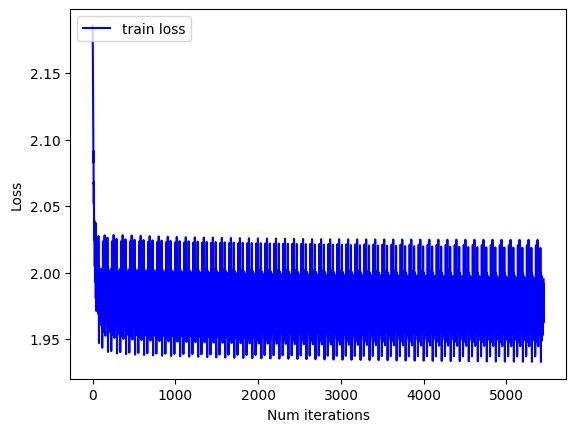

In [36]:
epochs = [i for i in range(5450)]
plt.plot(epochs, lossess_gcn_09, 'b', label="train loss")
plt.legend(loc='upper left')
plt.ylabel("Loss")
plt.xlabel("Num iterations")

Text(0.5, 0, 'Num epochs')

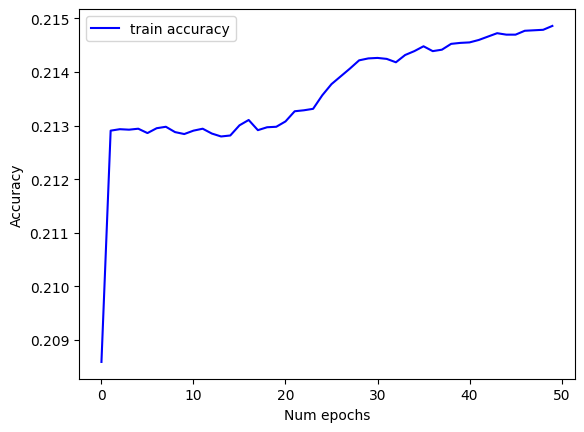

In [37]:
epochs = [i for i in range(50)]
plt.plot(epochs, accuracies_gcn_09, 'b', label="train accuracy");
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Num epochs")

Text(0.5, 0, 'Num epochs')

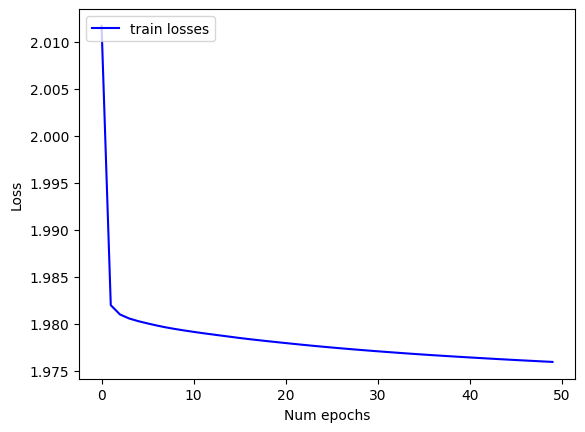

In [38]:
epochs = [i for i in range(50)]
plt.plot(epochs, epoch_lossess_gcn_09, 'b', label="train losses");
plt.legend(loc='upper left')
plt.ylabel("Loss")
plt.xlabel("Num epochs")

In [39]:
X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).float().squeeze()
y_pred = model(X_test_tensor)
pred = torch.max(y_pred, 1)[1].float()
accuracy = (pred == y_test_tensor).float().mean()
print("Accuracy on the test set: ", accuracy)

Accuracy on the test set:  tensor(0.2120)


In [47]:
stars

3

### Trying with only 5 classes

In [84]:
X_business = []
y_business = []
print(len(stars))
business_mappings = {}
i = 0
for business_id, rating in stars.items():
    business_mappings[business_id] = i
    X_business.append(get_feature_vector(business_id))
    y_business.append(int(rating))
    i += 1
y_cat = []
print(set(y_business))
sorted_y = sorted(set(y_business))
for val in y_business:
    y_cat.append(sorted_y.index(val))
print(min(y_cat), max(y_cat))

136602
{1, 2, 3, 4, 5}
0 4


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_business, y_cat, test_size=0.1, random_state=42)

### Logistic Regression

In [99]:

def model_log_reg(num_epochs=1000):
    X_train_tensor = torch.from_numpy(np.array(X_train)).float()
    y_train_tensor = torch.from_numpy(np.array(y_train)).float().squeeze()

    losses = []
    accuracies = []
    D_in = 23  
    D_out = 5  

    model = torch.nn.Sequential(torch.nn.Linear(D_in, D_out))
    loss_fn = nn.CrossEntropyLoss()
    learning_rate = 0.001
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor.long())
        pred = torch.max(y_pred, 1)[1].float()
        accuracy = (pred == y_train_tensor).float().mean()
        f1 = f1_score(y_train, pred, average="micro")
        losses.append(loss.item())
        accuracies.append(accuracy.item())

        if epoch % 50 == 0:
            print(f"Epoch {epoch}:, loss: {loss.item():.3f}, accuracy: {accuracy:.3f}, f1: {f1:.3f}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model, losses, accuracies

model_log_reg5, train_losses, train_accuracies = model_log_reg(1000)

X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).float().squeeze()

y_pred = model_log_reg5(X_test_tensor)
pred = torch.max(y_pred, 1)[1].float()
accuracy = (pred == y_test_tensor).float().mean()
print("Accuracy on the test set: ", accuracy)


Epoch 0:, loss: 146.779, accuracy: 0.371, f1: 0.371
Epoch 50:, loss: 76.358, accuracy: 0.283, f1: 0.283
Epoch 100:, loss: 28.497, accuracy: 0.279, f1: 0.279
Epoch 150:, loss: 11.604, accuracy: 0.300, f1: 0.300


KeyboardInterrupt: 

In [98]:
accuracies

NameError: name 'accuracies' is not defined

AUC for class 1: 0.575
AUC for class 2: 0.557
AUC for class 3: 0.499
AUC for class 4: 0.577
AUC for class 5: 0.692


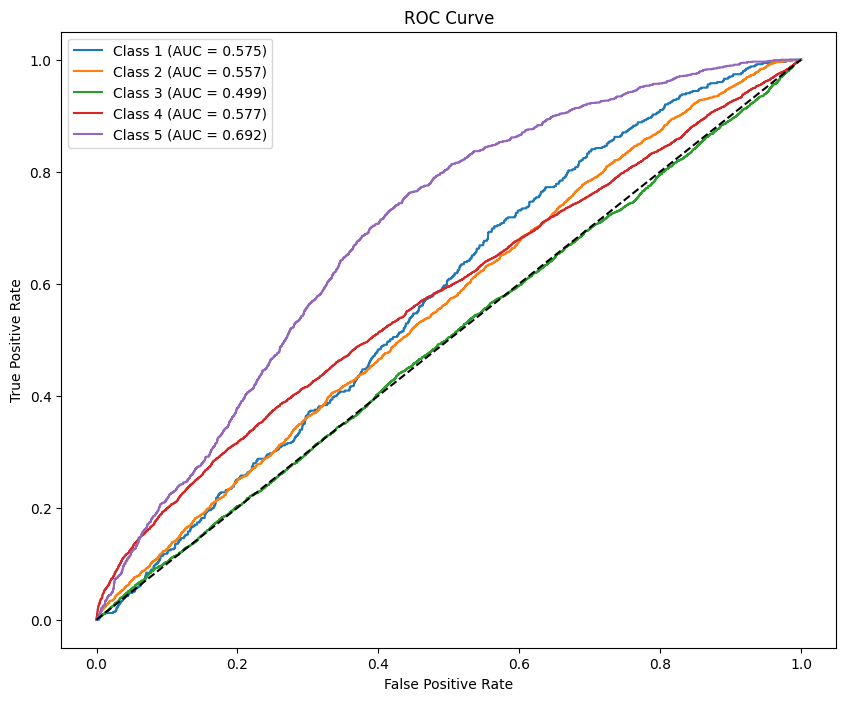

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Tính xác suất dự đoán
y_pred_probs = F.softmax(model_log_reg5(X_test_tensor), dim=1).detach().numpy()

# Chuyển y_test thành nhãn nhị phân
y_test_onehot = np.eye(5)[y_test]  # Chuyển thành dạng one-hot

# Tính AUC cho từng nhãn
auc_scores = []
for i in range(5):
    auc = roc_auc_score(y_test_onehot[:, i], y_pred_probs[:, i])
    auc_scores.append(auc)
    print(f"AUC for class {i+1}: {auc:.3f}")

# Vẽ biểu đồ ROC cho từng nhãn
plt.figure(figsize=(10, 8))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {auc_scores[i]:.3f})")

# Vẽ đường tham chiếu
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [89]:
print("y_test_onehot shape:", y_test_onehot.shape)  # Kiểm tra kích thước của y_test_onehot
print("y_pred_probs shape:", y_pred_probs.shape)  

y_test_onehot shape: (13661, 9)
y_pred_probs shape: (13661, 5)


In [61]:
# model_log_reg5 = logistic_regression(1000)
# X_test_tensor = torch.from_numpy(np.array(X_test)).float()
# y_test_tensor = torch.from_numpy(np.array(y_test)).float().squeeze()
# y_pred = model_log_reg(X_test_tensor)
# pred = torch.max(y_pred, 1)[1].float()
# accuracy = (pred == y_test_tensor).float().mean()
# print("Accuracy on the test set: ", accuracy)

# Linear regression

In [68]:
labels = np.array(y_train)
y_train_tensor = torch.LongTensor(labels)

In [70]:
y_train_tensor

tensor([4, 4, 3,  ..., 3, 3, 3])

In [103]:
losses = []
accuracies = []
def linear_regression(num_epochs = 1000):
    X_train_tensor = torch.from_numpy(np.array(X_train)).float()
    y_train_tensor = torch.from_numpy(np.array(y_train)).float().unsqueeze(1)
    D_in = 23
    D_out = 1
    epochs = [i for i in range(num_epochs)]
    model = torch.nn.Sequential(torch.nn.Linear(D_in, D_out))
    loss_fn = nn.MSELoss()
    learning_rate = 0.01
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor)
        pred = torch.round(y_pred * 2)/2
        accuracy = (pred == y_train_tensor).float().mean()
        losses.append(loss.item())
        accuracies.append(accuracy)
        #f1 = f1_score(y_train, pred, average="micro")
        if epoch % 200 == 0:
            print("Epoch {}:, loss: {:.3f}, accuracy: {:.3f}".format(epoch, loss.item(), accuracy))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model

In [51]:
X_business = []
y_business = []
print(len(stars))
business_mappings = {}
i = 0
for business_id, rating in stars.items():
    business_mappings[business_id] = i
    X_business.append(get_feature_vector(business_id))
    y_business.append(rating)
    i += 1

136602


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_business, y_business, test_size=0.1, random_state=42)

In [65]:
pred

tensor([[175.0000, 177.0000, 178.5000,  ..., 178.5000, 178.5000, 177.5000],
        [102.0000, 103.0000, 104.0000,  ..., 104.5000, 104.5000, 104.0000],
        [161.5000, 163.0000, 164.0000,  ..., 164.0000, 164.0000, 163.5000],
        ...,
        [ 56.5000,  57.5000,  57.5000,  ...,  59.0000,  58.5000,  58.5000],
        [156.5000, 166.0000, 170.0000,  ..., 172.0000, 172.0000, 163.0000],
        [ 80.0000,  81.0000,  81.5000,  ...,  83.5000,  83.5000,  82.5000]],
       grad_fn=<DivBackward0>)

In [105]:
lin_reg = linear_regression(10000)
X_test_tensor = torch.from_numpy(np.array(X_test)).float()
y_test_tensor = torch.from_numpy(np.array(y_test)).float().unsqueeze(1)
y_pred = model(X_test_tensor)
pred = torch.round(y_pred * 2)/2
accuracy = (pred == y_test_tensor).float().mean()
print("Accuracy on the test set: ", accuracy)

Epoch 0:, loss: 12444.912, accuracy: 0.006
Epoch 200:, loss: 2.582, accuracy: 0.070
Epoch 400:, loss: 2.122, accuracy: 0.155
Epoch 600:, loss: 1.716, accuracy: 0.230
Epoch 800:, loss: 1.415, accuracy: 0.232
Epoch 1000:, loss: 1.225, accuracy: 0.257
Epoch 1200:, loss: 1.120, accuracy: 0.216
Epoch 1400:, loss: 1.070, accuracy: 0.196
Epoch 1600:, loss: 1.049, accuracy: 0.163
Epoch 1800:, loss: 1.041, accuracy: 0.176
Epoch 2000:, loss: 1.037, accuracy: 0.174
Epoch 2200:, loss: 1.035, accuracy: 0.174
Epoch 2400:, loss: 1.034, accuracy: 0.174
Epoch 2600:, loss: 1.032, accuracy: 0.174
Epoch 2800:, loss: 1.031, accuracy: 0.173
Epoch 3000:, loss: 1.029, accuracy: 0.172
Epoch 3200:, loss: 1.027, accuracy: 0.172
Epoch 3400:, loss: 1.025, accuracy: 0.171
Epoch 3600:, loss: 1.022, accuracy: 0.170
Epoch 3800:, loss: 1.020, accuracy: 0.168
Epoch 4000:, loss: 1.017, accuracy: 0.167
Epoch 4200:, loss: 1.015, accuracy: 0.165
Epoch 4400:, loss: 1.012, accuracy: 0.163
Epoch 4600:, loss: 1.009, accuracy: 0

Text(0.5, 0, 'Num epochs')

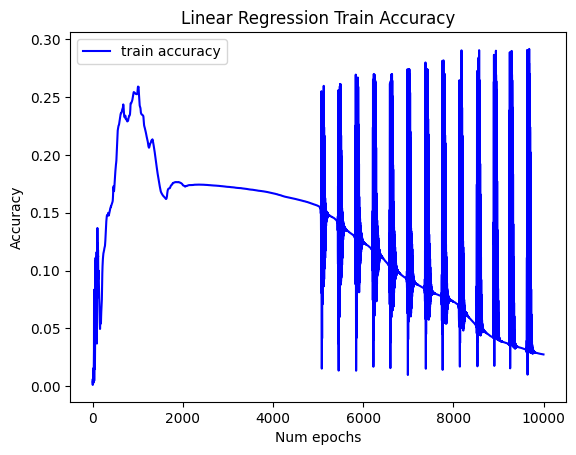

In [115]:
epochs = [i for i in range(50)]
plt.plot(epochs_linear, accuracies, 'b', label="train accuracy");
plt.title("Linear Regression Train Accuracy")
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Num epochs")

Text(0.5, 0, 'Num epochs')

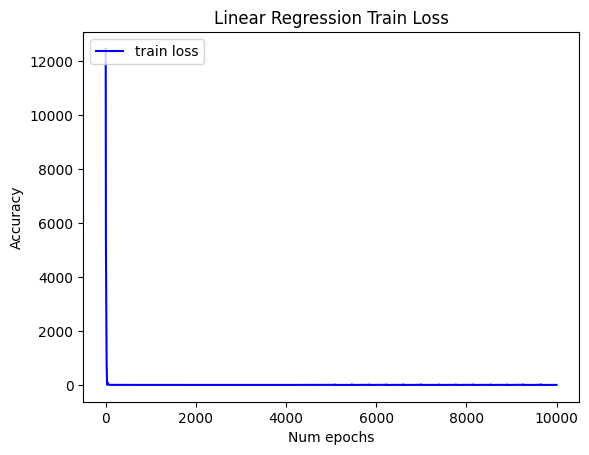

In [114]:
epochs = [i for i in range(50)]
plt.plot(epochs_linear, losses, 'b', label="train loss");
plt.title("Linear Regression Train Loss")
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Num epochs")

In [110]:
len(losses)

10000

In [108]:
epochs_linear = []
for i in range(10000):
    epochs_linear.append(i)

In [71]:
y_train_tensor[batch_nodes]

tensor([4, 4, 3, 4, 4, 2, 4, 3, 2, 3, 5, 5, 4, 3, 3, 3, 5, 4, 4, 2, 3, 3, 3, 4,
        4, 4, 4, 3, 4, 3, 5, 2, 1, 4, 5, 3, 4, 3, 5, 3, 4, 2, 4, 4, 4, 3, 2, 3,
        4, 1, 3, 1, 3, 3])

In [72]:
labels

array([4.5, 4.5, 3.5, ..., 3.5, 3.5, 3.5])

In [77]:
gcn = GCN(features_business, features_users, adj_lists, num_classes=5)
lossessgd1 = []
accuraciessgd1 = []
epoch_lossessgd1 = []
optimizer = torch.optim.SGD(filter(lambda p : p.requires_grad, gcn.parameters()), lr=0.1)
labels = np.array(y_train) - 1
y_train_tensor = torch.LongTensor(labels)
# y_train_tensor = y_train_tensor - 1
for i in range(100):
    #print("Epoch: ", i)
    num_correct = 0
    num_total = 0
    loss_sum = []
    # for batch in range(8*16):
    for batch in range(109):
        start_time = time.time()
        batch_nodes = train[1024*batch:1024*(batch+1)]
        optimizer.zero_grad()
        y_pred = gcn(batch_nodes)
        # print(y_pred)
        # print(y_train_tensor[batch_nodes])
        loss = gcn.loss(y_pred, y_train_tensor[batch_nodes])
        lossessgd1.append(loss.item())
        loss.backward()
        optimizer.step()
        end_time = time.time()
        batch_time = end_time - start_time
        #if batch % 50 == 0:
        pred = torch.max(y_pred, 1)[1].float() - 1
        # print(pred)
        # print(y_train_tensor[batch_nodes])
        num_correct += (pred == y_train_tensor[batch_nodes].float()).sum().item()
        num_total += len(batch_nodes)
        loss_sum.append(loss.item())
    print(f"num_correct: {num_correct}, num_total: {num_total}")
    acc = (num_correct*1.0) / num_total
    avg_loss = np.mean(loss_sum)
    epoch_lossessgd1.append(avg_loss)
    accuraciessgd1.append(acc)
    print("Epoch:", i, "Loss: ", avg_loss, "Batch time: ", batch_time, "Train accuracy: ", acc)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12888\55216514.py:15: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  init.xavier_uniform(self.weight)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12888\678471157.py:13: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  init.xavier_uniform(self.weight)


num_correct: 32850, num_total: 110646
Epoch: 0 Loss:  1.3949122636690052 Batch time:  0.004506587982177734 Train accuracy:  0.29689279323247114
num_correct: 33804, num_total: 110646
Epoch: 1 Loss:  1.3767938635764865 Batch time:  0.006066322326660156 Train accuracy:  0.3055148853099073
num_correct: 33804, num_total: 110646
Epoch: 2 Loss:  1.3763340131952129 Batch time:  0.007723808288574219 Train accuracy:  0.3055148853099073
num_correct: 33804, num_total: 110646
Epoch: 3 Loss:  1.3759935459959398 Batch time:  0.006245613098144531 Train accuracy:  0.3055148853099073
num_correct: 33804, num_total: 110646
Epoch: 4 Loss:  1.375706323789894 Batch time:  0.014057397842407227 Train accuracy:  0.3055148853099073
num_correct: 33804, num_total: 110646
Epoch: 5 Loss:  1.3754543525363327 Batch time:  0.004121541976928711 Train accuracy:  0.3055148853099073
num_correct: 33804, num_total: 110646
Epoch: 6 Loss:  1.3752324395223494 Batch time:  0.0036172866821289062 Train accuracy:  0.305514885309907

KeyboardInterrupt: 

In [ ]:
epochs = [i for i in range(12800)]
plt.plot(epochs, lossessgd1, 'b', label="train loss");
plt.legend(loc='upper left');
plt.ylabel("Loss");
plt.xlabel("Num iterations");

In [ ]:
epochs = [i for i in range(100)]
plt.plot(epochs, accuraciessgd1, 'b', label="train accuracy");
plt.legend(loc='upper left');
plt.ylabel("Accuracy");
plt.xlabel("Num epochs");

In [ ]:
epochs = [i for i in range(100)]
plt.plot(epochs, epoch_lossessgd1, 'b', label="train losses");
plt.legend(loc='upper left');
plt.ylabel("Loss");
plt.xlabel("Num epochs");